<a href="https://colab.research.google.com/github/maperezp/Proyecto-CDA/blob/main/src/ModelosClasificacionInfeccionPostTx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRERIAS**

In [326]:
### Importación de librerias
import pandas as pd
import seaborn as sns

# graficas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# **1. PREPARACIÓN DE DATOS**


In [327]:
# Carga de datos
data= pd.read_excel("../Data/Base_infecciones_POPTH_nuevo_modelado.xlsx")


In [328]:
data.shape

(557, 62)

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Código anonimizado                          557 non-null    object        
 1   #Paciente_Tx                                557 non-null    int64         
 2   Etiología_#1                                557 non-null    object        
 3   Etiología_#2                                557 non-null    object        
 4   Edad                                        557 non-null    int64         
 5   Sexo                                        557 non-null    object        
 6   Child_Pugh_Score_Cat                        158 non-null    object        
 7   Child_Pugh_Score                            557 non-null    int64         
 8   Meld_Score                                  557 non-null    int64         
 9   Diabetes_M

Se eliminan las columnas de identificación de pacientes para el modelado.

In [330]:
data_modelo= data.drop(columns=[ "Código anonimizado", "#Paciente_Tx"])

Se eliminan las variables asociadas a fechas ya que la informacion temporal no será tenida en cuenta en el modelo.


In [331]:
vars_date_to_drop = ["Año_Tx", 'Fecha_Tx', 'Fecha_Control/Muerte', 'Fecha_Ingreso_Hospitalario', "Fecha_Egreso_Hospitalario"]
data_modelo = data_modelo.drop(columns=vars_date_to_drop)

Se eliminan otras columnas con datos faltantes.

In [332]:
na_values = ["DESCONOCIDO", -1.0, -1]
data_na = data_modelo.replace(na_values, np.nan)
vars_to_drop_nulls = data_na.columns[data_na.isna().mean() > 0.4]
print(f"Variables eliminadas por tener más del 40% de valores nulos: {list(vars_to_drop_nulls)}")
data_modelo = data_na.drop(columns=vars_to_drop_nulls)

Variables eliminadas por tener más del 40% de valores nulos: ['Child_Pugh_Score_Cat', 'Child_Pugh_Score', 'Peso_previo_Cx', 'Talla', 'IMC', 'Días_Totales_Intrahospitalarios_Pre_Tx', 'Localización de la infección', 'Germen/Microorganismo aislado', 'Tiempo_De_Dosis_Hasta_Tx#1', 'Inmunosupresión_con_Anticuerpos']


In [333]:
vars_to_drop = ['SOBREVIDA_DIAS',
       'SOBREVIDA_MESES', 'SOBREVIDA_AÑOS', "Vivo_Hoy"]
data_modelo = data_modelo.drop(columns=vars_to_drop)

In [334]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Etiología_#1                                557 non-null    object 
 1   Etiología_#2                                557 non-null    object 
 2   Edad                                        557 non-null    int64  
 3   Sexo                                        557 non-null    object 
 4   Meld_Score                                  535 non-null    float64
 5   Diabetes_Mellitus                           547 non-null    object 
 6   Tabaquismo                                  552 non-null    object 
 7   Alcoholismo                                 552 non-null    object 
 8   Hipertensión_Arterial                       430 non-null    object 
 9   UCI_6_meses_Pre_Tx                          551 non-null    object 
 10  Días_En_UCI_Pr

Una vez hemos homogenizado la base de datos de los valores faltantes, podemos proceder a aplicar el pipeline que aplica el modelo.

Como nuestro objetivo es encontrar si existió infección post transplante (1 si sí, 0 de lo contrario), crearemos una nueva variable que condense esa información. Los parámetros para determinar el valor de esta nueva variable serán si alguno de los valores las variables que inician con "Inmunosupresor" contiene un valor distinto a invalido.

In [335]:
invalidos =  ["DESCONOCIDO", "No", np.nan]


In [336]:
inmuno_var= ["Inmunosupresor_1_Postx",
    "Inmunosupresor_2_PostTx",
"Inmunosupresor_1_1mesPostTx",
"Inmunosupresor_2_PostTx_1mesPx",
"Inmunosupresor_1_6mesesPostx",
"Inmunosupresor_2_6mesesPostTx"]

In [337]:
data_modelo[inmuno_var]

,Inmunosupresor_1_Postx,Inmunosupresor_2_PostTx,Inmunosupresor_1_1mesPostTx,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx
0,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
1,CICLOSPORINA,MICOFENOLATO,NaN,NaN,NaN,NaN
2,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,No
3,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,No
4,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
...,...,...,...,...,...,...
552,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
553,NaN,NaN,NaN,NaN,NaN,NaN
554,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
555,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO,TACROLIMUS,No


In [338]:
episodios_inmunosupresion = (~data_modelo[inmuno_var].isin(invalidos)).sum(axis=1) 
data_modelo["infeccion_post_TX"]= (episodios_inmunosupresion > 3).astype(int)

Podemos evidenciar la nueva columna calculada que codifica si un paciente tuvo infección o no luego de el tratamiento

In [339]:
data_modelo["infeccion_post_TX"].value_counts()

infeccion_post_TX
1    503
0     54
Name: count, dtype: int64

In [340]:
data_modelo.drop(columns=inmuno_var, inplace=True)

In [341]:
num_vars = data_modelo.select_dtypes(include="number").columns
cat_vars = data_modelo.select_dtypes(exclude="number").columns

In [342]:
num_vars

Index(['Edad', 'Meld_Score', 'Días_En_UCI_Pre_Tx', 'Tiempo_Isquemia_Fria',
       'Tiempo_Isquemia_caliente', 'Tiempo_Cx',
       'Días_Tratamiento_Antibiótico_Previo_A_Tx#1', 'Nutrición_Enteral',
       'Días_Nutrición_Enteral', 'Complicaciones_Técnicas',
       'Dias_Estancia_Hospitalaria', 'Días_En_UCI_Post_Tx',
       'Días_En_Hospitalización_Piso_Post_Tx',
       'Días_Totales_Intrahospitalarios_Post_Tx', 'infeccion_post_TX'],
      dtype='object')

In [343]:
cat_vars

Index(['Etiología_#1', 'Etiología_#2', 'Sexo', 'Diabetes_Mellitus',
       'Tabaquismo', 'Alcoholismo', 'Hipertensión_Arterial',
       'UCI_6_meses_Pre_Tx', 'UCI_al_Momento_Tx', 'Tipo_Reconstrucción_Biliar',
       'Infección_Al_Momento_Tx', 'Antibiotico_previo_al_Tx',
       'Antibiótico_Profiláctico_VS_Terapéutico', 'Antibiótico_1__Tx#1',
       'Antibiótico_2_Tx#1', 'Antibiótico_3_Tx#1', 'Antifúngico_Tx#1',
       'Requerimiento_de_diálisis', 'Trasfusión_GRE_hasta_1m_POP',
       'Reintervención_Quirúrgica_hasta_1m_POP', 'Retrasplante'],
      dtype='object')

In [344]:
data_modelo_dum = pd.get_dummies(data_modelo, columns=cat_vars, prefix=cat_vars, prefix_sep="=", dummy_na=False)

In [345]:
dum_cols = [c for c in data_modelo_dum.columns if "=" in c]
data_modelo_dum[dum_cols] = data_modelo_dum[dum_cols].astype(int)

In [346]:
data_modelo = data_modelo_dum.copy()

Realizamos una selección de variables para el modelado, eliminando las columnas que no aportan información relevante o que pueden generar ruido en el modelo.

In [347]:
from scipy.stats import ks_2samp, chi2_contingency

umbral_p = 0.05  # Flexibilidad para datasets pequeños
num_sel = []
for col in num_vars:
    class0 = data_modelo[data_modelo['infeccion_post_TX']==0][col]
    class1 = data_modelo[data_modelo['infeccion_post_TX']==1][col]
    ks_stat, ks_p = ks_2samp(class0, class1)
    if ks_p < umbral_p:
        num_sel.append(col)

cat_sel = []
for col in dum_cols:
    table = pd.crosstab(data_modelo[col], data_modelo['infeccion_post_TX'])
    try:
        _, chi2_p, _, _ = chi2_contingency(table)
        if chi2_p < umbral_p:
            cat_sel.append(col)
    except:
        pass # Para categorías con una sola clase puede fallar

vars_final = list(set(num_sel + cat_sel))

if len(vars_final) == 0:
    print(f"Ninguna variable supera p < {umbral_p}. Usando todas las numéricas y dummies de país/género como fallback.")
else:
    print(f"Variables seleccionadas (p < {umbral_p}):\n", vars_final)

X = data_modelo[vars_final]
y = data_modelo['infeccion_post_TX']

Variables seleccionadas (p < 0.05):
 ['Etiología_#1=BUDDCHIARI', 'Antibiótico_1__Tx#1=CEFTRIAXONA', 'Requerimiento_de_diálisis=NO', 'Antibiótico_Profiláctico_VS_Terapéutico=Profiláctico', 'UCI_6_meses_Pre_Tx=NO', 'Antibiótico_2_Tx#1=NO', 'Antibiótico_Profiláctico_VS_Terapéutico=Terapéutico ', 'Dias_Estancia_Hospitalaria', 'Requerimiento_de_diálisis=SI', 'Antibiotico_previo_al_Tx=NO', 'Etiología_#1=FHF', 'Tipo_Reconstrucción_Biliar=Ducto - Ducto', 'Trasfusión_GRE_hasta_1m_POP=SI', 'UCI_al_Momento_Tx=SI', 'Antifúngico_Tx#1=NO', 'infeccion_post_TX', 'Complicaciones_Técnicas', 'UCI_6_meses_Pre_Tx=SI', 'UCI_al_Momento_Tx=NO', 'Reintervención_Quirúrgica_hasta_1m_POP=SI', 'Retrasplante=NO', 'Antibiotico_previo_al_Tx=SI', 'Retrasplante=SI', 'Trasfusión_GRE_hasta_1m_POP=NO', 'Reintervención_Quirúrgica_hasta_1m_POP=NO']


In [348]:
X

,Etiología_#1=BUDDCHIARI,Antibiótico_1__Tx#1=CEFTRIAXONA,Requerimiento_de_diálisis=NO,Antibiótico_Profiláctico_VS_Terapéutico=Profiláctico,UCI_6_meses_Pre_Tx=NO,Antibiótico_2_Tx#1=NO,Antibiótico_Profiláctico_VS_Terapéutico=Terapéutico,Dias_Estancia_Hospitalaria,Requerimiento_de_diálisis=SI,Antibiotico_previo_al_Tx=NO,...,infeccion_post_TX,Complicaciones_Técnicas,UCI_6_meses_Pre_Tx=SI,UCI_al_Momento_Tx=NO,Reintervención_Quirúrgica_hasta_1m_POP=SI,Retrasplante=NO,Antibiotico_previo_al_Tx=SI,Retrasplante=SI,Trasfusión_GRE_hasta_1m_POP=NO,Reintervención_Quirúrgica_hasta_1m_POP=NO
0,0,0,1,1,1,0,0,10,0,1,...,1,0,0,1,1,1,0,0,1,0
1,0,0,1,1,1,0,0,1,0,1,...,0,1,0,1,1,1,0,0,1,0
2,0,0,1,1,1,0,0,11,0,1,...,1,0,0,1,0,1,0,0,1,1
3,0,0,1,1,1,0,0,9,0,1,...,1,0,0,1,0,1,0,0,1,1
4,0,0,1,1,1,0,0,8,0,1,...,1,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0,1,1,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,1
553,0,0,0,1,0,1,0,0,1,1,...,0,1,1,1,0,0,0,0,0,0
554,0,0,1,1,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,1
555,0,0,1,1,1,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,1


In [349]:
data_modelo= X.copy()

In [350]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Etiología_#1=BUDDCHIARI                               557 non-null    int64
 1   Antibiótico_1__Tx#1=CEFTRIAXONA                       557 non-null    int64
 2   Requerimiento_de_diálisis=NO                          557 non-null    int64
 3   Antibiótico_Profiláctico_VS_Terapéutico=Profiláctico  557 non-null    int64
 4   UCI_6_meses_Pre_Tx=NO                                 557 non-null    int64
 5   Antibiótico_2_Tx#1=NO                                 557 non-null    int64
 6   Antibiótico_Profiláctico_VS_Terapéutico=Terapéutico   557 non-null    int64
 7   Dias_Estancia_Hospitalaria                            557 non-null    int64
 8   Requerimiento_de_diálisis=SI                          557 non-null    int64
 9  

# **2. MODELOS DE CLASIFICACIÓN**

In [351]:
# Librerias para el modelado
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [352]:
# Función para imprimir métricas
def print_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    print(f"{name:15}  Accuracy: {acc:.3f}  Precision: {prec:.3f}  Recall: {rec:.3f}")

# Modelo 1: Regresión Logística

In [353]:
#lista_nan=["Hipertensión_Arterial","IMC","Talla","Peso_previo_Cx","Child_Pugh_Score_Label","Child_Pugh_Score","Localización de la infección","Germen/Microorganismo aislado","Inmunosupresión_con_Anticuerpos","Localización de la infección","Tiempo_De_Dosis_Hasta_Tx#1","SOBREVIDA_DIAS", "SOBREVIDA_MESES", "SOBREVIDA_AÑOS"]
#df= sin.drop(columns=lista_nan, errors = "ignore")

df = data_modelo.copy()
target = "infeccion_post_TX"
y = df[target]
X = df.drop(columns=[target])

num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns  # incluye object/category; ojo con datetime

# si se tiene datetime, mejor sacarlas de cat_cols o convertirlas antes a partes (hour, dow, etc.)
# cat_cols = cat_cols.drop(["mi_col_fecha"], errors="ignore")

In [354]:
# Separación de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() == 2 else None
)

test, val = train_test_split(X_test, test_size=0.5, random_state=42)

In [355]:
# Preprocesamiento
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_cols),
    ],
    remainder="drop"
)


param_grid= {
        "clf__solver": ["lbfgs"],
        "clf__penalty": ["l2"],
        "clf__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "clf__class_weight": [None, "balanced"],
        "clf__max_iter": [2000],
    }


model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=None))
])

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",      # suele ser mejor que accuracy si hay desbalance
    cv=5,
    n_jobs=-1,
    verbose=1
)



grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
best_lr = grid.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best params: {'clf__C': 0.1, 'clf__class_weight': None, 'clf__max_iter': 2000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best CV score: 0.9280898876404494


In [356]:
best_lr.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


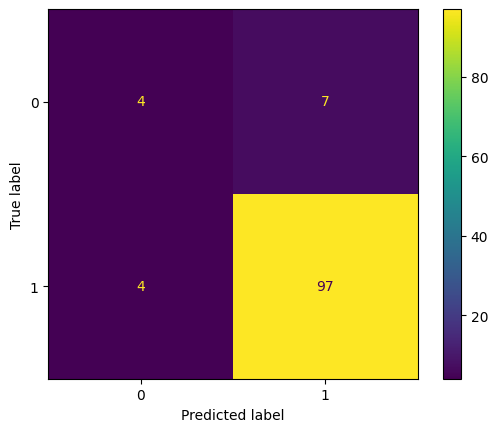

In [357]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_predictions = best_lr.predict(X_test)
cm = confusion_matrix(y_test, y_test_predictions, labels=best_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_lr.classes_)
disp.plot()
plt.show()

In [358]:
from sklearn.metrics import classification_report
# ...existing code...
target_names = [str(label) for label in best_lr.classes_]
print(classification_report(y_test, y_test_predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.93      0.96      0.95       101

    accuracy                           0.90       112
   macro avg       0.72      0.66      0.68       112
weighted avg       0.89      0.90      0.89       112



In [359]:
# guardar el modelo
import os
import joblib
os.makedirs('../models', exist_ok=True)
joblib.dump(best_lr, '../models/logistic_regression_infeccion_post_tx_model.pkl')

['../models/logistic_regression_infeccion_post_tx_model.pkl']

# Modelo 2: Random Forest 

In [360]:
# GridSearchCV seguro: n_splits limitado por tamaño de la clase minoritaria
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC

min_class_size = y_train.value_counts().min()
n_splits = min(5, min_class_size)
if n_splits < 2:
    n_splits = 2  # Asegura al menos 2 splits
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Random Forest
params_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [4, 8, 12, None],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params_rf)
grid_rf.fit(X_train, y_train)
rf_best_model = grid_rf.best_estimator_
print("Mejor Random Forest: ", grid_rf.best_params_)

Mejor Random Forest:  {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 100}


### Evaluación del modelo

In [361]:
pred_rf_train   = rf_best_model.predict(X_train)
print_metrics("Random_Forest train: ",y_train,pred_rf_train )

Random_Forest train:   Accuracy: 0.942  Precision: 0.959  Recall: 0.978


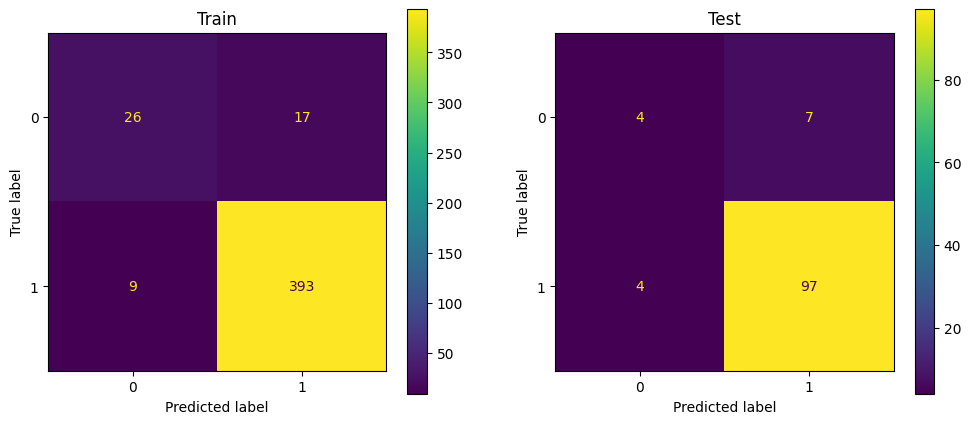

In [362]:
y_train_predictions_best = rf_best_model.predict(X_train)
y_test_predictions_best = rf_best_model.predict(X_test)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, y_train_predictions_best, labels=rf_best_model.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=rf_best_model.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, y_test_predictions_best, labels=rf_best_model.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=rf_best_model.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [363]:
from sklearn.metrics import classification_report
target_names = [str(label) for label in rf_best_model.classes_]
print(classification_report(y_test, y_test_predictions_best, target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.93      0.96      0.95       101

    accuracy                           0.90       112
   macro avg       0.72      0.66      0.68       112
weighted avg       0.89      0.90      0.89       112



### Importancias de las características

In [364]:
importances = rf_best_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
df_importances = pd.DataFrame({
    "Feature": feature_names[indices],
    "Importance": importances[indices],
}).sort_values(by="Importance", ascending=False)
df_importances.head(10)

,Feature,Importance
0,Requerimiento_de_diálisis=NO,0.183328
1,Trasfusión_GRE_hasta_1m_POP=SI,0.178053
2,Requerimiento_de_diálisis=SI,0.147280
3,Trasfusión_GRE_hasta_1m_POP=NO,0.121941
4,Dias_Estancia_Hospitalaria,0.075365
5,Reintervención_Quirúrgica_hasta_1m_POP=SI,0.041017
6,Retrasplante=NO,0.037430
7,Tipo_Reconstrucción_Biliar=Ducto - Ducto,0.034094
8,Reintervención_Quirúrgica_hasta_1m_POP=NO,0.029971
9,Complicaciones_Técnicas,0.026322


# Modelo 3: Regresión Lineal

No es un modelo de clasificación, pero se incluye para entender la relación entre las variables  y la variable objetivo.

In [365]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


def regression_metrics(y_true, y_pred, n_features: int = None):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    n = len(y_true)
    p = n_features  # por ejemplo X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1) if n_features is not None else None

    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': round(r2, 4),
        'Adj R²': round(r2_adj, 4) if r2_adj is not None else None,
        'MAPE': round(mape, 4)*100
    }


    print(f"MAE:   {mae:.4f} ")
    print(f"RMSE:  {rmse:.4f} ")
    print(f"R²:    {r2:.4f}")

    return metrics

In [366]:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [367]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred_train = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
metrics_train = regression_metrics(y_train, y_pred_train, n_features=X_train.shape[1])

MAE:   0.1125 
RMSE:  0.2220 
R²:    0.4352


In [368]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred_test = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
metrics_test = regression_metrics(y_test, y_pred_test, n_features=X_test.shape[1])

MAE:   0.1369 
RMSE:  0.2648 
R²:    0.2085


In [369]:
coeficientes = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': modelo_regresion.coef_
})
coeficientes.head(10)

,Feature,Coefficient
0,Etiología_#1=BUDDCHIARI,-0.214675
1,Antibiótico_1__Tx#1=CEFTRIAXONA,-0.275632
2,Requerimiento_de_diálisis=NO,0.120267
3,Antibiótico_Profiláctico_VS_Terapéutico=Profil...,-0.020168
4,UCI_6_meses_Pre_Tx=NO,0.309179
5,Antibiótico_2_Tx#1=NO,-0.026716
6,Antibiótico_Profiláctico_VS_Terapéutico=Terapé...,0.020168
7,Dias_Estancia_Hospitalaria,0.000672
8,Requerimiento_de_diálisis=SI,-0.120267
9,Antibiotico_previo_al_Tx=NO,-0.013712
